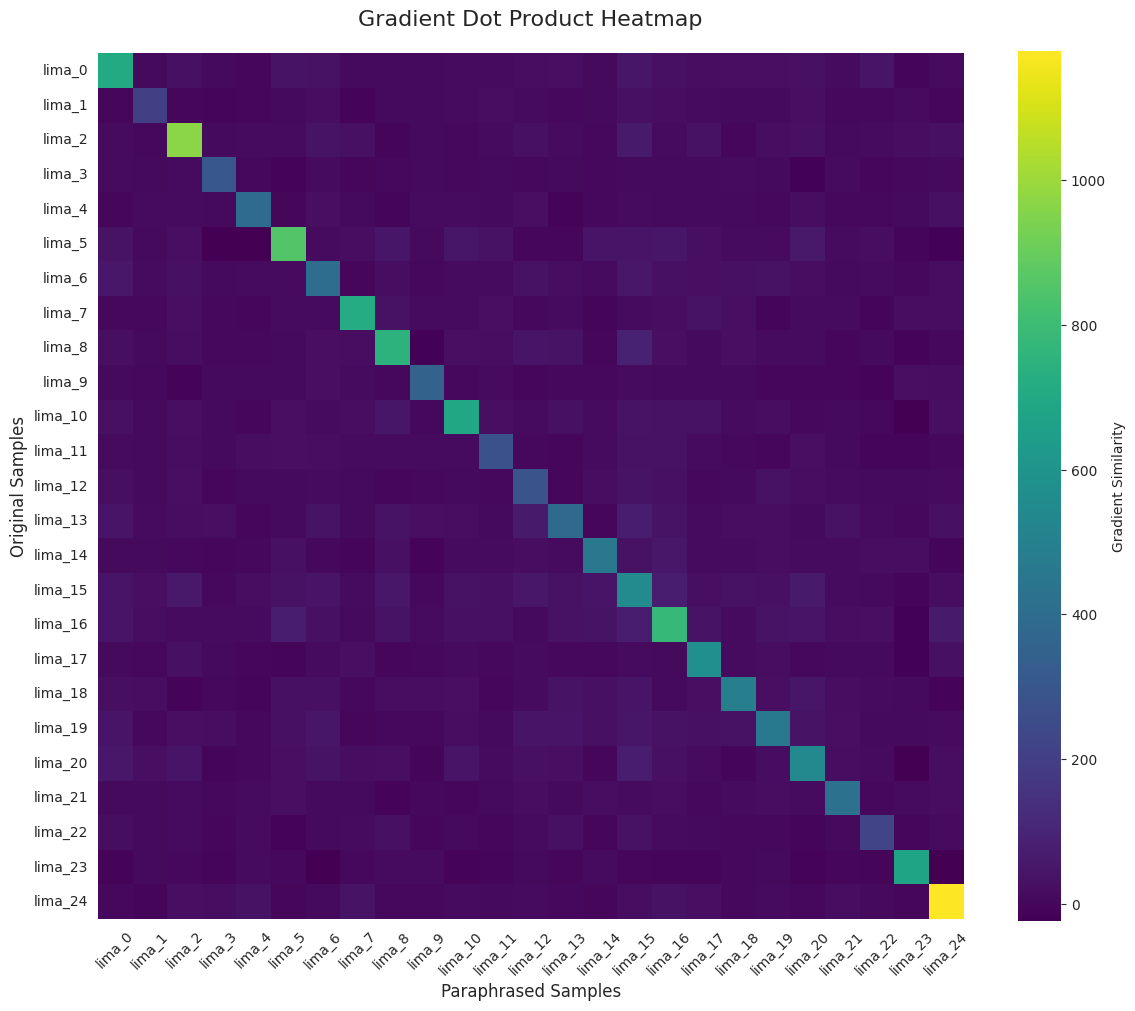

In [1]:
import os.path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the gradient similarity data
df = pd.read_csv('/home/lukashinterleitner/Documents/Master_Data_Science/Master_Thesis/data/gradient_similarity/sample_size_25.csv', index_col=0)

# Fix the ordering - sort columns and index numerically
def extract_number(col_name):
    """Extract number from column name like 'lima_5' -> 5"""
    return int(col_name.split('_')[1])

# Sort columns and index by the numeric part
sorted_columns = sorted(df.columns, key=extract_number)
sorted_index = sorted(df.index, key=extract_number)

# Reorder the dataframe
df = df.reindex(index=sorted_index, columns=sorted_columns)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df,
            annot=False,  # Set to True if you want to show values in cells
            cmap='viridis',  # Color scheme - you can try 'coolwarm', 'RdYlBu', etc.
            square=True,  # Make cells square-shaped
            cbar_kws={'label': 'Gradient Similarity'},
            xticklabels=True,
            yticklabels=True)

plt.title('Gradient Dot Product Heatmap', fontsize=16, pad=20)
plt.xlabel('Paraphrased Samples', fontsize=12)
plt.ylabel('Original Samples', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("../results/preliminary_analysis_dot_products.png", bbox_inches='tight', dpi=300)

plt.show()


Gradient Similarity Matrix Statistics:
Shape: (25, 25)
Min value: -23.98
Max value: 1178.28
Mean value: 33.65
Diagonal (self-similarity) mean: 544.67


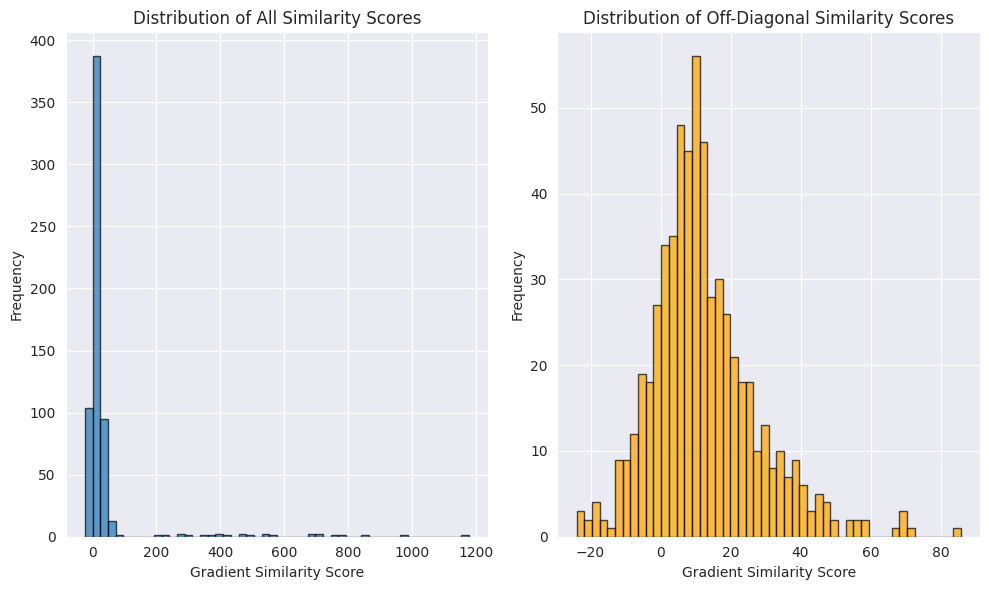

In [2]:
# Display basic statistics about the similarity matrix
print("Gradient Similarity Matrix Statistics:")
print(f"Shape: {df.shape}")
print(f"Min value: {df.min().min():.2f}")
print(f"Max value: {df.max().max():.2f}")
print(f"Mean value: {df.mean().mean():.2f}")
print(f"Diagonal (self-similarity) mean: {np.diag(df).mean():.2f}")

# Show distribution of similarity scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df.values.flatten(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of All Similarity Scores')
plt.xlabel('Gradient Similarity Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Remove diagonal values for off-diagonal distribution
off_diagonal = df.values[~np.eye(df.shape[0], dtype=bool)]
plt.hist(off_diagonal, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Off-Diagonal Similarity Scores')
plt.xlabel('Gradient Similarity Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
